<a href="https://colab.research.google.com/github/sku1978/sk-share-repo/blob/main/ML/Recommender-System/Simple%20Recommender%20System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', 1000)

In [2]:
import datetime
def dateparse (time_in_secs):
  try : 
    return datetime.datetime.fromtimestamp(float(time_in_secs))
  except:
    return datetime.datetime.fromtimestamp(float(0))

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/sku1978/sk-share-repo/main/ML/Recommender-System/ratings.csv', sep=',', parse_dates=['timestamp'], date_parser=dateparse)
movies=pd.read_csv('https://raw.githubusercontent.com/sku1978/sk-share-repo/main/ML/Recommender-System/movies.csv', sep=',')

In [4]:
df

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51
...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12


In [5]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [6]:
movies['genres_dict']=movies.apply(lambda row: row.genres.split('|'), axis=1).apply(lambda row: dict.fromkeys(row, '1'))

In [7]:
movie_classification=pd.concat([movies['title'],movies['genres_dict'].apply(pd.Series).drop('(no genres listed)', axis=1).fillna(0)], axis=1).set_index('title')

In [8]:
movie_classification.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir
title,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jumanji (1995),1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Grumpier Old Men (1995),0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Waiting to Exhale (1995),0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
Father of the Bride Part II (1995),0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movieId      9742 non-null   int64 
 1   title        9742 non-null   object
 2   genres       9742 non-null   object
 3   genres_dict  9742 non-null   object
dtypes: int64(1), object(3)
memory usage: 304.6+ KB


In [11]:
df=pd.merge(df,movies,on='movieId')

In [12]:
df_movie=pd.DataFrame(df.groupby('title').rating.mean())
df_movie['num_of_rating']=pd.DataFrame(df.groupby('title').rating.count())

In [13]:
df_movie.sort_values('num_of_rating', ascending=False)

,rating,num_of_rating
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
...,...,...
King Solomon's Mines (1950),3.000000,1
King Solomon's Mines (1937),2.500000,1
King Ralph (1991),1.500000,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa519598110>]],
      dtype=object)

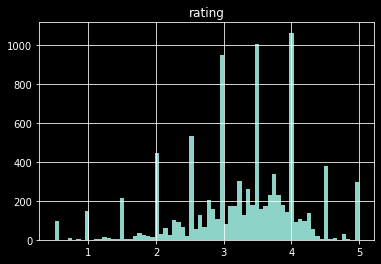

In [14]:
plt.style.use('dark_background')
df_movie.hist(column='rating', bins=70)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa51aa21f10>]],
      dtype=object)

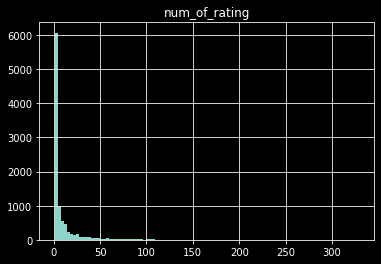

In [15]:
df_movie.hist(column='num_of_rating', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa51a414a50>]],
      dtype=object)

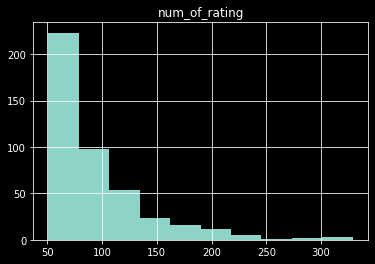

In [16]:
df_movie[(df_movie['num_of_rating']>50)].hist(column='num_of_rating')

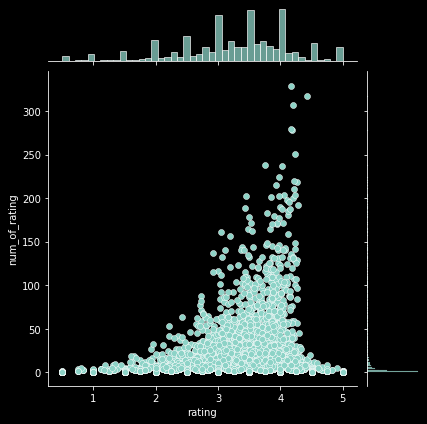

In [17]:
sns.jointplot(data=df_movie, x='rating', y='num_of_rating')

In [18]:
df_movie[(df_movie['num_of_rating']>50)]['num_of_rating']

title
10 Things I Hate About You (1999)                                                                  54
12 Angry Men (1957)                                                                                57
2001: A Space Odyssey (1968)                                                                      109
28 Days Later (2002)                                                                               58
300 (2007)                                                                                         80
40-Year-Old Virgin, The (2005)                                                                     74
A.I. Artificial Intelligence (2001)                                                                56
Abyss, The (1989)                                                                                  62
Ace Ventura: Pet Detective (1994)                                                                 161
Ace Ventura: When Nature Calls (1995)                                       

In [19]:
#limit movies to those watched by more than 50 users
df_filtered=df.merge(df_movie[(df_movie['num_of_rating']>50)]['num_of_rating'],on='title')

In [20]:
moviemat=df_filtered.pivot_table(index='userId', columns='title', values='rating')

In [21]:
moviemat

title,10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),Air Force One (1997),Airplane! (1980),Aladdin (1992),Alien (1979),Aliens (1986),Almost Famous (2000),Amadeus (1984),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),"American President, The (1995)",American Psycho (2000),Anchorman: The Legend of Ron Burgundy (2004),Animal House (1978),Annie Hall (1977),Apocalypse Now (1979),Apollo 13 (1995),Arachnophobia (1990),Armageddon (1998),Army of Darkness (1993),As Good as It Gets (1997),Austin Powers in Goldmember (2002),Austin Powers: International Man of Mystery (1997),Austin Powers: The Spy Who Shagged Me (1999),Avatar (2009),"Avengers, The (2012)",Babe (1995),Back to the Future (1985),...,Toy Story (1995),Toy Story 2 (1999),Toy Story 3 (2010),Traffic (2000),Training Day (2001),Trainspotting (1996),True Lies (1994),True Romance (1993),"Truman Show, The (1998)","Truth About Cats & Dogs, The (1996)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Unbreakable (2000),"Untouchables, The (1987)",Up (2009),"Usual Suspects, The (1995)",V for Vendetta (2006),Vertigo (1958),WALL·E (2008),Wallace & Gromit: The Wrong Trousers (1993),War of the Worlds (2005),Waterworld (1995),Wayne's World (1992),Wedding Crashers (2005),"Wedding Singer, The (1998)",What Women Want (2000),What's Eating Gilbert Grape (1993),When Harry Met Sally... (1989),While You Were Sleeping (1995),Who Framed Roger Rabbit? (1988),Wild Wild West (1999),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)","Wolf of Wall Street, The (2013)",X-Men (2000),X-Men: The Last Stand (2006),X2: X-Men United (2003),Young Frankenstein (1974),Zombieland (2009),Zoolander (2001)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,4.0,NaN,NaN,NaN,NaN,5.0,NaN,5.0,5.0,NaN,5.0,NaN,NaN,5.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,4.0,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,4.0,5.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,5.0,NaN,4.0,Na

In [22]:
#get a list of highest watched movies to test
df_movie.sort_values('num_of_rating', ascending=False).head(10)

,rating,num_of_rating
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [23]:
df[(df['title'] == 'Matrix, The (1999)')].head(1)

,userId,movieId,rating,timestamp,title,genres,genres_dict
12642,1,2571,5.0,2000-07-30 18:31:28,"Matrix, The (1999)",Action|Sci-Fi|Thriller,"{'Action': '1', 'Sci-Fi': '1', 'Thriller': '1'}"


In [24]:
movie_name='Matrix, The (1999)'
test_movie=moviemat[movie_name]
test_movie_classification=pd.DataFrame(movie_classification.loc[movie_name,:]).transpose()

NameError: ignored

In [27]:
moviemat.multiply(test_movie_classification).sum().head()

10 Things I Hate About You (1999)    0.0
12 Angry Men (1957)                  0.0
2001: A Space Odyssey (1968)         0.0
28 Days Later (2002)                 0.0
300 (2007)                           0.0
dtype: float64

In [26]:
moviemat.corrwith(test_movie).sort_values(ascending=False).head(10)

title
Matrix, The (1999)                  1.000000
Slumdog Millionaire (2008)          0.613839
Kung Fu Panda (2008)                0.612549
Interstellar (2014)                 0.599040
Legends of the Fall (1994)          0.567155
Dark Knight Rises, The (2012)       0.557125
Die Hard (1988)                     0.544466
Grand Budapest Hotel, The (2014)    0.543633
Matrix Reloaded, The (2003)         0.522551
Inception (2010)                    0.514767
dtype: float64